In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
Ncomps = 16

In [2]:
A = pd.read_csv('61317files/2017-06-15samples_by_component_NcompPD16.txt', sep='\t')

In [3]:
A.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,names
0,0,23232.664258,676.164807,3787.429463,0.000000,0.000000,0.0000,27723.722391,7808.970347,0.0,9784.746023,913.014043,7083.895463,0.00000,0.0,132820.302669,4109.635086,vHMEC_DS18406
1,1,1493.887002,6032.314402,7696.152904,36858.269277,68945.766972,5399.0632,0.000000,0.000000,0.0,16980.058519,3682.665865,9578.772157,1382.83601,0.0,3954.482056,0.000000,Trophoblast_DS19317
2,2,30416.364613,2567.371561,10828.446928,15945.174901,0.000000,0.0000,0.000000,1568.832196,0.0,0.000000,8467.748480,9566.142903,0.00000,0.0,0.000000,45420.650596,SKNDZ_DS21405
3,3,29443.429052,4003.216792,12325.965266,15266.033288,0.000000,0.0000,0.000000,1433.164121,0.0,0.000000,5810.281620,11073.097834,0.00000,0.0,0.000000,36349.560584,SKNDZ_DS21399
4,4,26540.001454,3954.821166,12897.388759,14863.940698,0.000000,0.0000,0.000000,1102.383893,0.0,0.000000,5686.658624,12008.880259,0.00000,0.0,0.000000,35132.484238,SKNDZ_DS21387


In [4]:
A.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', 'names'],
      dtype='object')

In [12]:
A.shape

(827, 18)

In [13]:
A.rename(index=str, columns={"Unnamed: 0": "ID"}, inplace=True)

In [14]:
A.head()

,ID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,names
0,0,23232.664258,676.164807,3787.429463,0.000000,0.000000,0.0000,27723.722391,7808.970347,0.0,9784.746023,913.014043,7083.895463,0.00000,0.0,132820.302669,4109.635086,vHMEC_DS18406
1,1,1493.887002,6032.314402,7696.152904,36858.269277,68945.766972,5399.0632,0.000000,0.000000,0.0,16980.058519,3682.665865,9578.772157,1382.83601,0.0,3954.482056,0.000000,Trophoblast_DS19317
2,2,30416.364613,2567.371561,10828.446928,15945.174901,0.000000,0.0000,0.000000,1568.832196,0.0,0.000000,8467.748480,9566.142903,0.00000,0.0,0.000000,45420.650596,SKNDZ_DS21405
3,3,29443.429052,4003.216792,12325.965266,15266.033288,0.000000,0.0000,0.000000,1433.164121,0.0,0.000000,5810.281620,11073.097834,0.00000,0.0,0.000000,36349.560584,SKNDZ_DS21399
4,4,26540.001454,3954.821166,12897.388759,14863.940698,0.000000,0.0000,0.000000,1102.383893,0.0,0.000000,5686.658624,12008.880259,0.00000,0.0,0.000000,35132.484238,SKNDZ_DS21387


In [15]:
borf=A.values[:,1:Ncomps+1]

In [16]:
borf.shape

(827, 16)

In [17]:
borf.shape

(827, 16)

In [18]:
borf=np.array(borf)

In [20]:
WinningComponent = np.argmax(borf, axis=1)

In [21]:
WinningRatio = np.max(borf, axis=1)/np.sum(borf, axis=1)

In [22]:
borf

array([[23232.664257974284, 676.1648069906463, 3787.429463108709, ..., 0.0,
        132820.3026686523, 4109.635086044547],
       [1493.887002068794, 6032.314401731809, 7696.152904398877, ..., 0.0,
        3954.482055572502, 0.0],
       [30416.364612989517, 2567.371560671841, 10828.446928054946, ...,
        0.0, 0.0, 45420.650595783045],
       ..., 
       [0.0, 0.0, 21933.119161473627, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 21084.052597872495, ..., 0.0, 0.0, 21806.85447161565],
       [8406.578120070099, 463.62682975347735, 19164.19464570542, ..., 0.0,
        0.0, 17959.43421954369]], dtype=object)

In [23]:
borfsums = np.sum(borf, axis=1)

In [24]:
borfRats = np.copy(borf)

In [25]:
for i, rat in  enumerate(borfRats):
    rat/=borfsums[i]

In [26]:
borfRats

array([[0.10660092781684034, 0.00310251958113488, 0.01737826924734414, ...,
        0.0, 0.6094336551406107, 0.018856679901041513],
       [0.009221281742465798, 0.037235527573685555, 0.04750586501273433,
        ..., 0.0, 0.024409739913032653, 0.0],
       [0.24375850407450672, 0.020575064081311663, 0.08677979956571252,
        ..., 0.0, 0.0, 0.36400371918841],
       ..., 
       [0.0, 0.0, 0.42877827226635623, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.49157394978180186, ..., 0.0, 0.0, 0.5084260502181982],
       [0.1437905347324283, 0.007930117202788465, 0.3277944671974741, ...,
        0.0, 0.0, 0.3071876110631474]], dtype=object)

In [27]:
num5percentComps = []
for i in borfRats:
    num5percentComps.append(len(i[i>=0.05]))

In [28]:
len(num5percentComps)

827

In [29]:
num5percentComps

[3,
 4,
 6,
 6,
 6,
 4,
 5,
 2,
 5,
 5,
 4,
 1,
 4,
 5,
 6,
 5,
 2,
 3,
 5,
 6,
 2,
 3,
 3,
 2,
 4,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 6,
 6,
 1,
 3,
 2,
 5,
 2,
 2,
 3,
 4,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 4,
 4,
 4,
 2,
 2,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 2,
 3,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 7,
 8,
 4,
 4,
 5,
 2,
 3,
 4,
 4,
 3,
 3,
 2,
 4,
 6,
 6,
 2,
 3,
 3,
 4,
 2,
 2,
 3,
 2,
 3,
 5,
 5,
 3,
 2,
 2,
 6,
 4,
 3,
 4,
 3,
 6,
 7,
 3,
 2,
 4,
 4,
 6,
 4,
 3,
 1,
 3,
 4,
 6,
 3,
 3,
 7,
 2,
 7,
 4,
 4,
 5,
 4,
 4,
 2,
 4,
 7,
 4,
 4,
 6,
 5,
 7,
 4,
 4,
 4,
 2,
 3,
 6,
 6,
 5,
 3,
 4,
 4,
 2,
 6,
 5,
 4,
 1,
 5,
 5,
 4,
 4,
 5,
 4,
 2,
 4,
 1,
 4,
 3,
 4,
 5,
 3,
 3,
 5,
 4,
 2,
 4,
 3,
 3,
 1,
 2,
 5,
 4,
 2,
 2,
 3,
 4,
 4,
 3,
 5,
 4,
 4,
 4,
 3,
 3,
 3,
 2,
 3,
 1,
 3,
 3,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 4,
 3,
 2,
 3,
 3,
 3,
 4,
 3,
 2,
 5,
 5,
 8,
 3,
 4,
 4,
 5,
 6,
 5,
 5,
 4,
 2,
 2,
 3,
 4,
 4,
 4,
 4,
 3,
 6,
 3,
 3,
 2,
 2,
 3,
 4,
 3,
 2,


In [30]:
borfRats = borfRats.astype(np.float32)

In [31]:
from sklearn.manifold import TSNE

In [32]:
model = TSNE(n_components=2, random_state=0)

In [33]:
cool = model.fit_transform(borfRats) 

In [34]:
cool

array([[ 16.0763772 ,   3.17327529],
       [ -4.06877726,  18.17649769],
       [ -5.77494813,   4.98060524],
       ..., 
       [  7.1449546 ,  -3.16678728],
       [-10.48032296,   6.01398117],
       [ -6.51038172,   4.45080876]])

In [35]:
cool.shape

(827, 2)

In [36]:
import seaborn as sns
import numpy as np
answer = 827
#Comp_colors = ['red', 'tan', 'lime','blue','m','k','c', 'coral', 'indigo','darkgreen','orange','grey','gold', 'lightskyblue', 'peru', 'olive']
Comp_colors = []
Comp_values = []
if (answer>0):
	#from matplotlib import colors as mcolors
	colornames = list(sns.xkcd_rgb.keys())
    #colorvals = list(sns.xkcd_rgb.values())
	count = 0
	while (count < answer):
		newcolor = colornames[np.random.randint(0,len(colornames))]
		trialcount = 0
		while ((newcolor in Comp_colors) and (trialcount < 100) and ('white' in newcolor)):
			newcolor = colornames[np.random.randint(0,len(colornames))]
			trialcount+=1
		Comp_colors.append(newcolor)
		Comp_values.append(sns.xkcd_rgb[newcolor])
		count+=1

In [37]:
Comp_colors

['mud green',
 'orangey brown',
 'claret',
 'leaf',
 'greyish',
 'purplish pink',
 'poo brown',
 'dark navy blue',
 'blue/grey',
 'baby purple',
 'dirty orange',
 'bluish',
 'tea',
 'deep pink',
 'pinkish grey',
 'blurple',
 'desert',
 'medium grey',
 'bright sky blue',
 'grey/blue',
 'red brown',
 'periwinkle blue',
 'yellowy green',
 'strawberry',
 'bright lime green',
 'purpley grey',
 'ultramarine',
 'yellowish tan',
 'brown grey',
 'soft pink',
 'light yellow',
 'canary',
 'dusky blue',
 'greeny blue',
 'burnt red',
 'royal',
 'barney',
 'eggplant',
 'ugly pink',
 'yellowish orange',
 'khaki',
 'ruby',
 'purplish',
 'sunflower',
 'purplish grey',
 'dull teal',
 'denim',
 'tealish green',
 'pig pink',
 'very light pink',
 'drab green',
 'light pink',
 'pinky red',
 'mango',
 'brick',
 'forest green',
 'pale mauve',
 'lavender pink',
 'dark green',
 'drab green',
 'off blue',
 'brownish orange',
 'bluish green',
 'rusty red',
 'purple/blue',
 'pastel yellow',
 'raw sienna',
 'pinkis

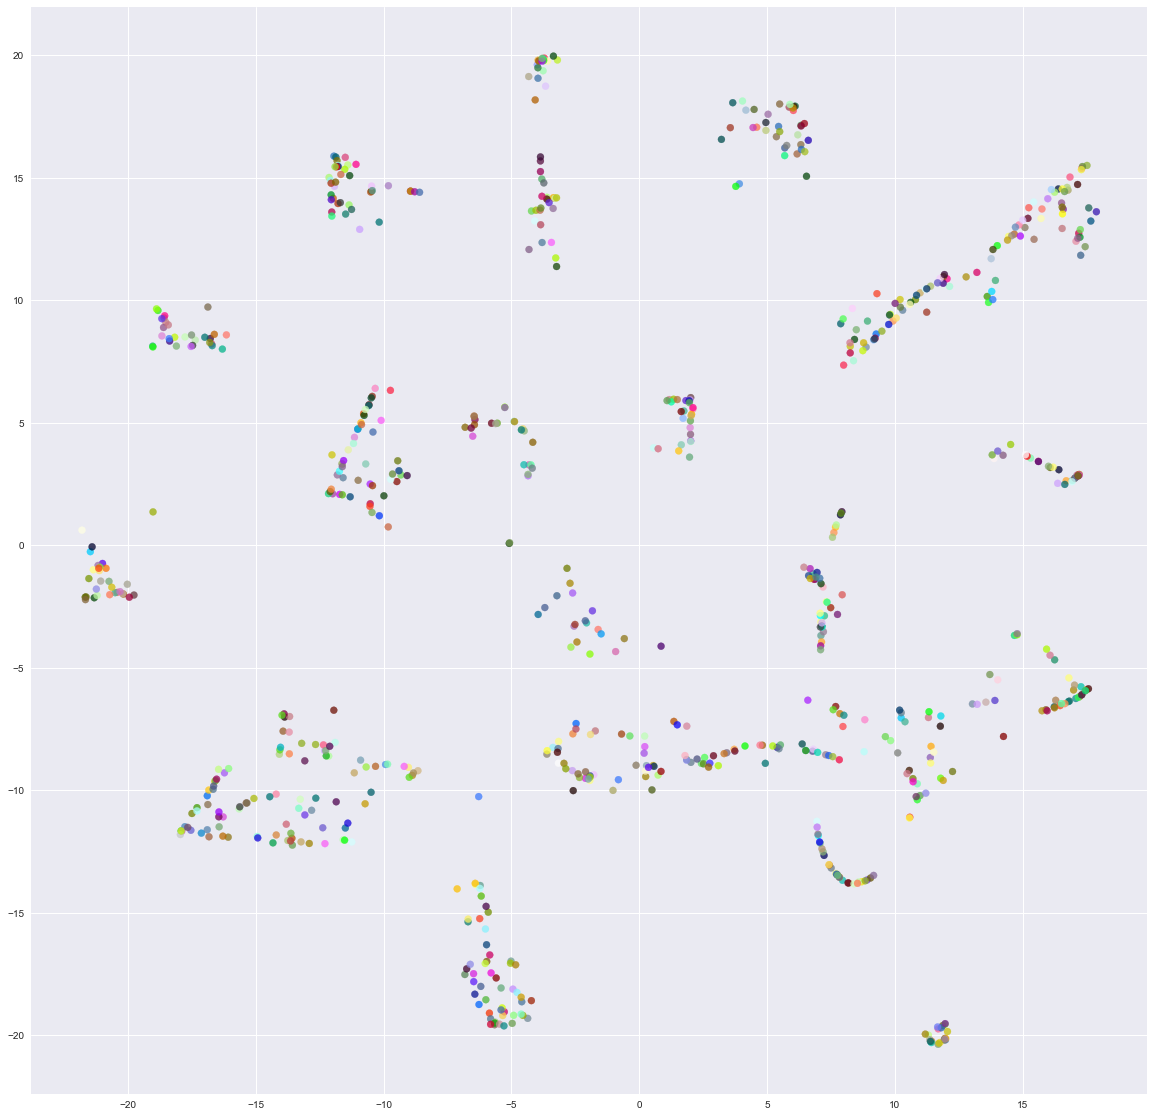

In [38]:
plt.figure(figsize=(20,20))
plt.clf()
plt.scatter(cool[:,0], cool[:,1], c=Comp_values, alpha = 0.75)

plt.show()

In [39]:
def increase_axis_fontsize():
	ax = plt.gca()
	ticklabels = ax.get_xticklabels()
	for label in ticklabels:
		label.set_fontsize(axis_fontsize)
		label.set_family('serif')
	ticklabels = ax.get_yticklabels()
	for label in ticklabels:
		label.set_fontsize(axis_fontsize)
		label.set_family('serif')

In [40]:
axis_fontsize = 30

In [43]:
sns.set_style("white")


In [44]:
from adjustText import adjust_text


In [45]:
num80percentComps = []
for i in borfRats:
    num80percentComps.append(len(i[i>=0.8]))

In [46]:
num80percentComps

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,


In [47]:
len(num80percentComps)

827

In [48]:
borfRats.shape

(827, 16)

In [49]:
WinningComponent

array([14,  4, 15, 15, 15, 15, 15, 14,  2,  2,  2,  3,  2,  6, 12, 12,  7,
        2,  2,  2, 15,  4,  4,  4,  2,  2,  2,  8,  8, 10, 10,  2, 10, 10,
       10, 10, 10,  2,  2,  2,  7,  7,  7, 10,  8, 10,  7, 12,  7, 14, 11,
       12,  2, 14,  7,  0,  7,  7,  5,  5,  5, 13,  5,  3, 14, 14,  9,  9,
        9,  9,  7,  7,  5,  7,  7,  7,  7, 14, 14,  7,  0,  0,  0,  0,  0,
        0, 15, 15,  7, 15, 15,  3,  3, 15, 15,  5, 14,  7,  7, 15, 15,  5,
        6, 14, 15, 15,  0,  2,  0, 15,  7, 15,  6,  5, 15, 15,  7,  8, 15,
        9,  9,  5,  5, 10,  2,  7,  7,  0,  8,  9, 15,  9,  7,  5,  7,  7,
        6,  5,  0, 15,  0, 12,  1, 15,  8,  2,  6, 15,  0, 14, 15,  2,  8,
        9,  5,  0,  0,  2, 15, 15, 15,  2, 15,  3,  3,  7, 15, 15,  0,  7,
        7,  7,  7,  9, 14,  5, 14, 14,  5,  5,  7,  7,  5,  6,  5,  5,  7,
        1, 15, 15,  3,  5,  6,  5,  6,  3, 14, 14, 14, 14,  2,  5,  5,  7,
        5,  5,  5,  5,  7,  7,  5,  5,  6,  5,  7,  7,  7,  7,  6,  5,  5,
        5,  5,  6,  2,  1

In [50]:
first16colors = ['red', 'tan', 'lime','blue','m','k','c', 'coral', 'indigo','dark\
green','orange','grey','gold', 'lightskyblue', 'peru', 'olive']
color_by_components = []
for i in WinningComponent:
    color_by_components.append(first16colors[i])
    


In [51]:
len(color_by_components)

827

In [52]:
color_by_components

['peru',
 'm',
 'olive',
 'olive',
 'olive',
 'olive',
 'olive',
 'peru',
 'lime',
 'lime',
 'lime',
 'blue',
 'lime',
 'c',
 'gold',
 'gold',
 'coral',
 'lime',
 'lime',
 'lime',
 'olive',
 'm',
 'm',
 'm',
 'lime',
 'lime',
 'lime',
 'indigo',
 'indigo',
 'orange',
 'orange',
 'lime',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'lime',
 'lime',
 'lime',
 'coral',
 'coral',
 'coral',
 'orange',
 'indigo',
 'orange',
 'coral',
 'gold',
 'coral',
 'peru',
 'grey',
 'gold',
 'lime',
 'peru',
 'coral',
 'red',
 'coral',
 'coral',
 'k',
 'k',
 'k',
 'lightskyblue',
 'k',
 'blue',
 'peru',
 'peru',
 'darkgreen',
 'darkgreen',
 'darkgreen',
 'darkgreen',
 'coral',
 'coral',
 'k',
 'coral',
 'coral',
 'coral',
 'coral',
 'peru',
 'peru',
 'coral',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'olive',
 'olive',
 'coral',
 'olive',
 'olive',
 'blue',
 'blue',
 'olive',
 'olive',
 'k',
 'peru',
 'coral',
 'coral',
 'olive',
 'olive',
 'k',
 'c',
 'peru',
 'olive',
 'olive',
 'red

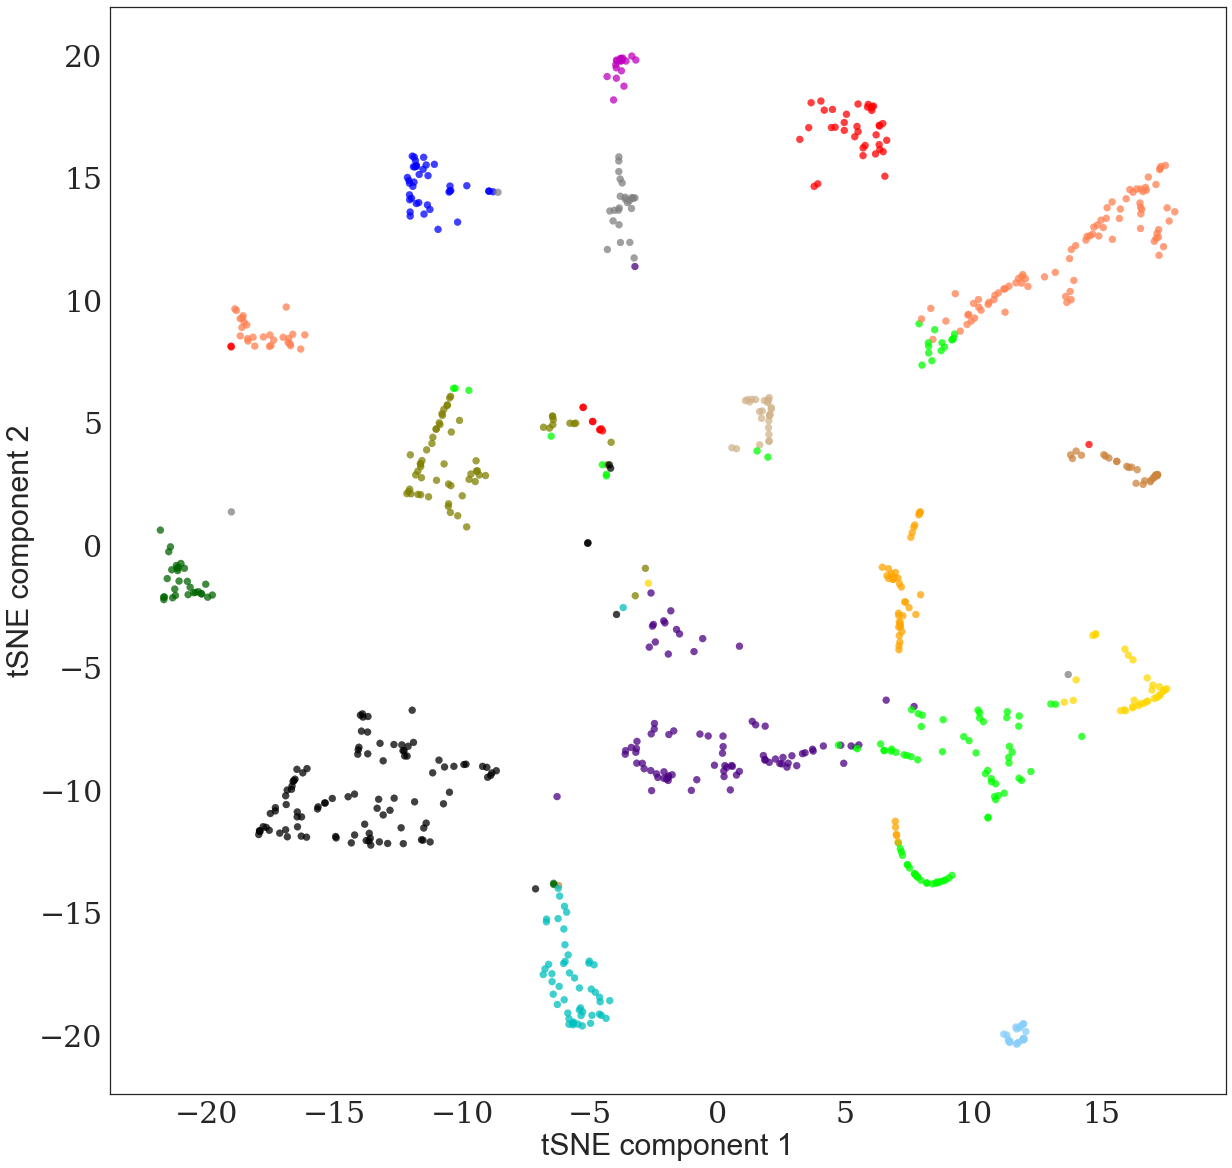

In [53]:
plt.figure(figsize=(20,20))
plt.clf()
plt.scatter(cool[:,0], cool[:,1], c=color_by_components, alpha = 0.75)
plt.xlabel('tSNE component 1', fontsize =30)
plt.ylabel('tSNE component 2', fontsize =30)
increase_axis_fontsize()
plt.show()

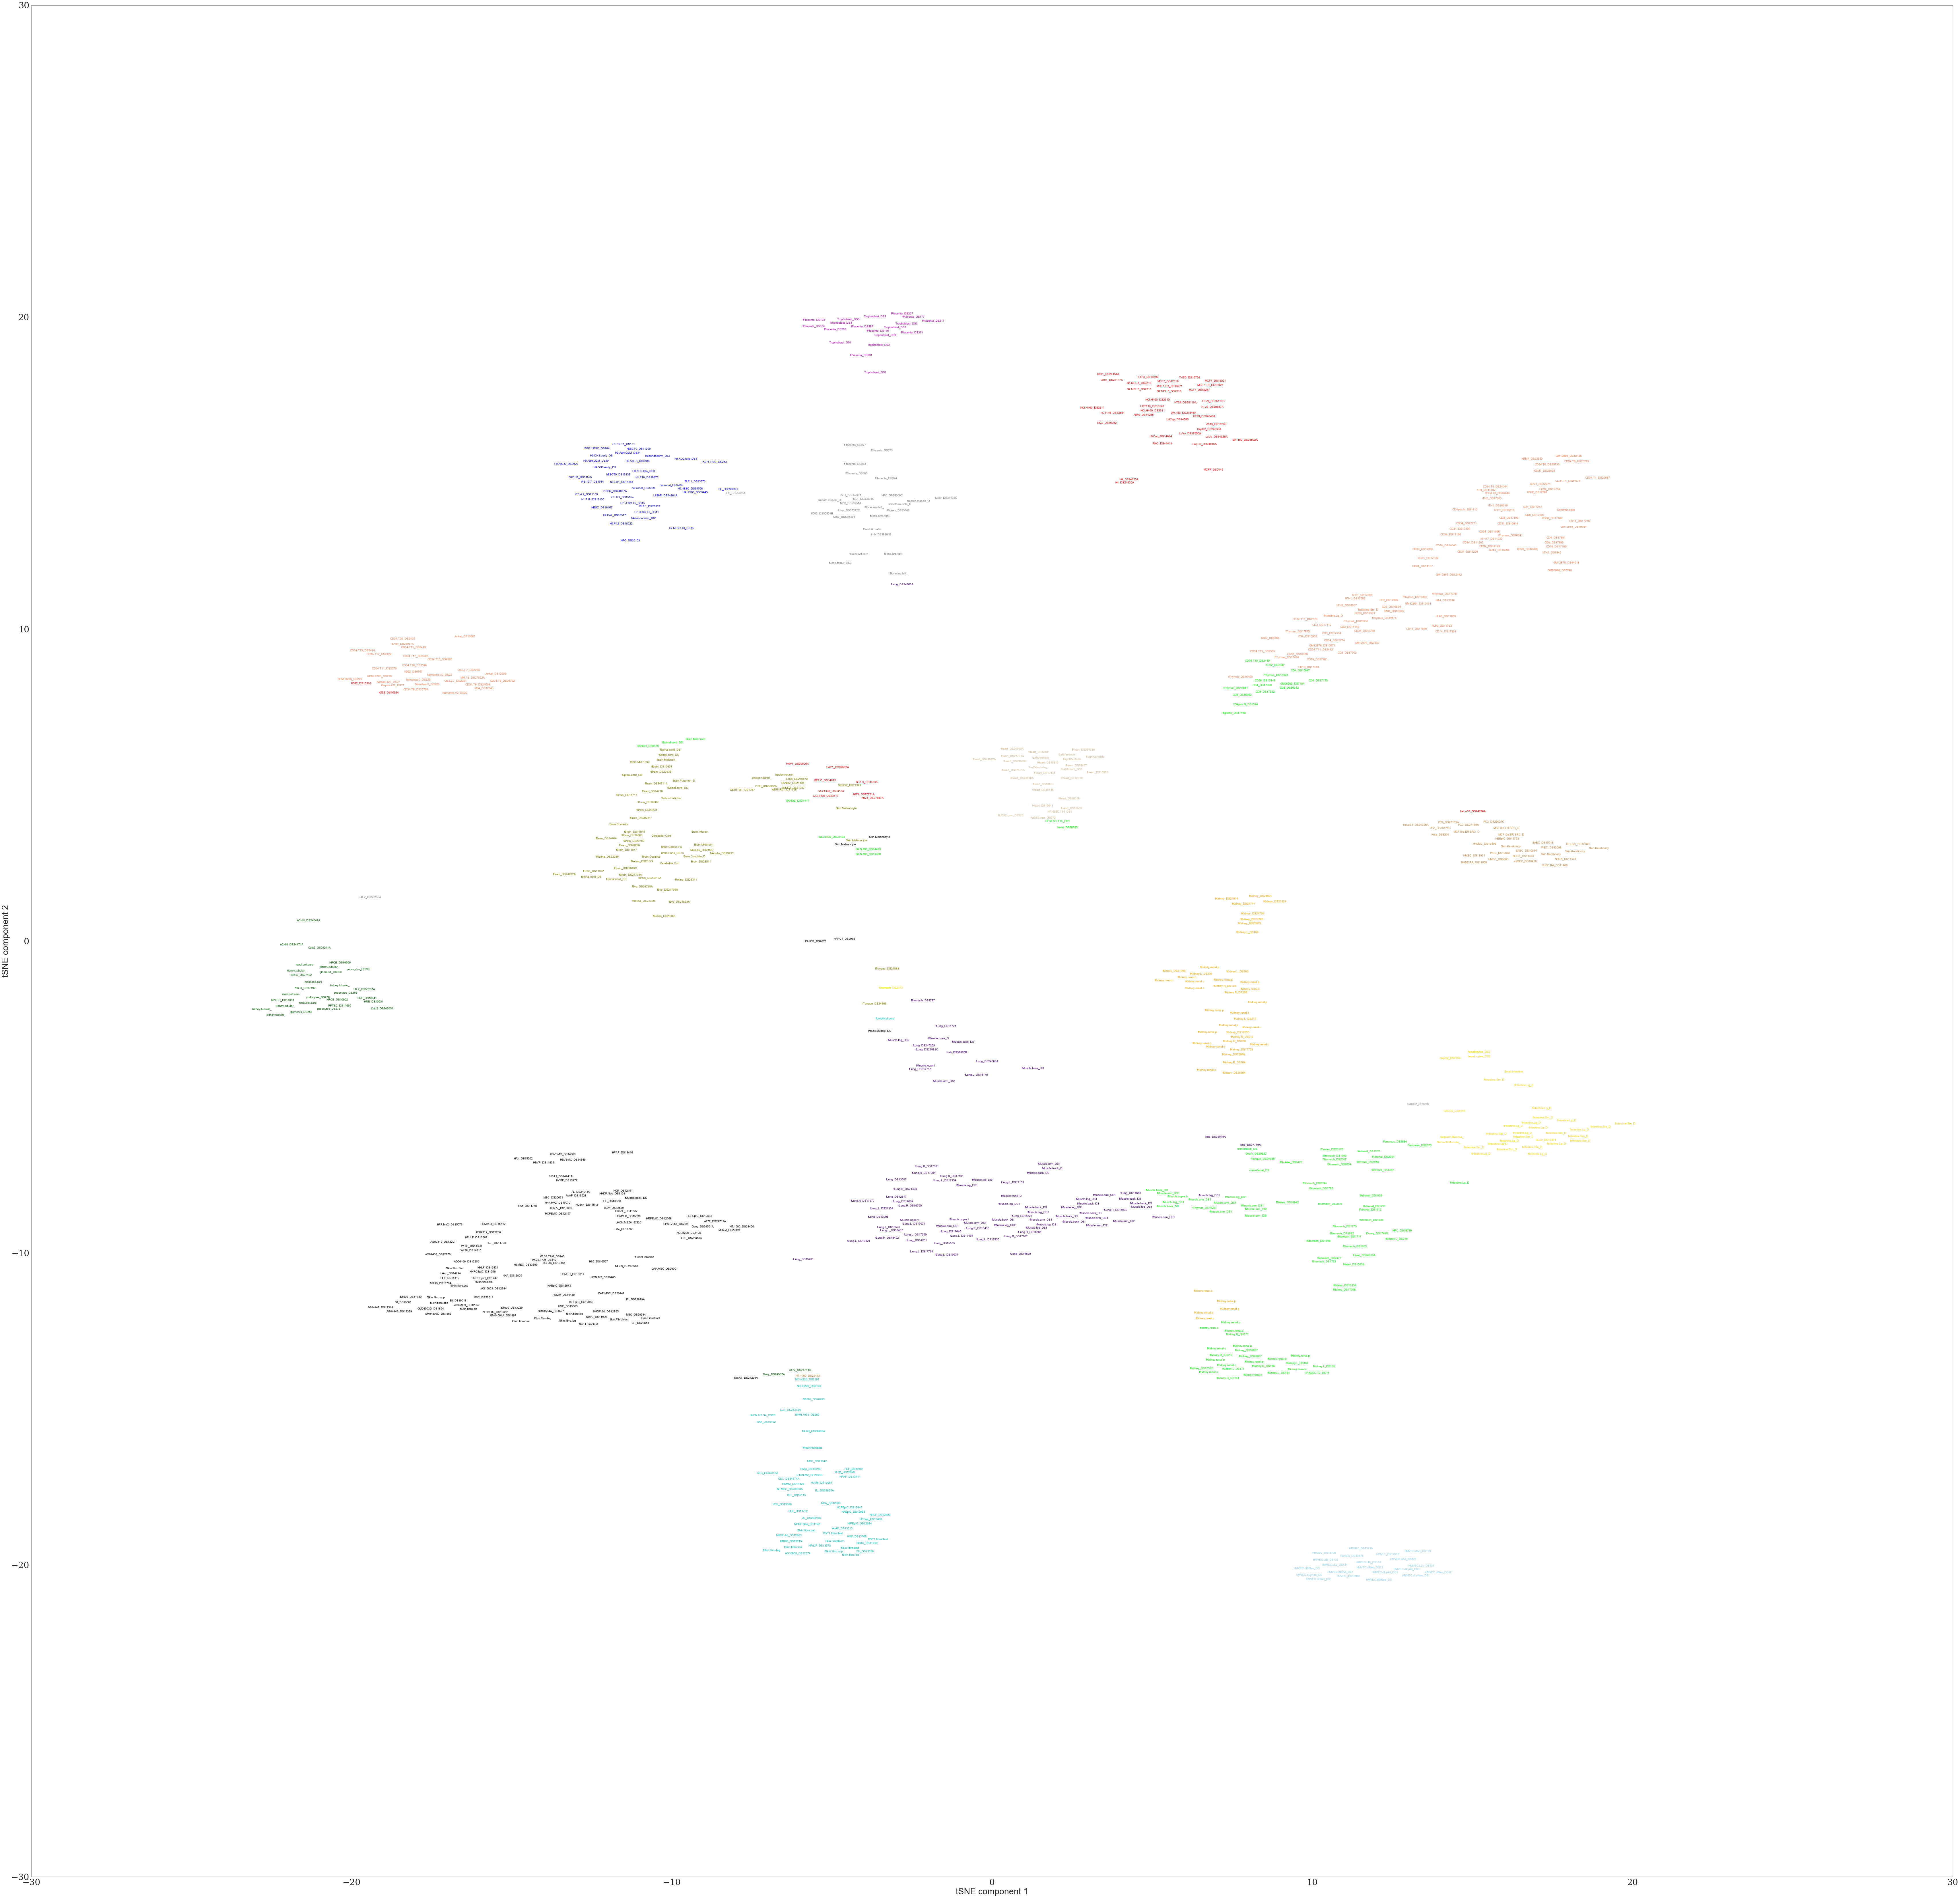

In [54]:
plt.figure(figsize=(120,120))
plt.clf()
txts = []
#plt.text(A['names'], x=cool[:,0], y=cool[:,1])
plt.xlim([-30,30])
plt.ylim([-30, 30])
for i, coolT in enumerate(cool):
    txts.append(plt.text(coolT[0], coolT[1], A['names'][i][0:15], fontsize=10, color=color_by_components[i], alpha=1))
    #plt.point(coolT[0], coolT[1])
    #print()
adjust_text(txts)
plt.xlabel('tSNE component 1', fontsize =30)
plt.ylabel('tSNE component 2', fontsize =30)
increase_axis_fontsize()
plt.show()

In [55]:
barsortorder = np.array([])
for i in range(16):
    barsortorder = np.append(barsortorder, np.argwhere(WinningComponent==i))

In [56]:
np.append(np.array([]), np.argwhere(WinningComponent==0))

array([  55.,   80.,   81.,   82.,   83.,   84.,   85.,  106.,  108.,
        127.,  138.,  140.,  148.,  155.,  156.,  168.,  232.,  293.,
        295.,  345.,  346.,  359.,  361.,  380.,  381.,  390.,  391.,
        407.,  408.,  420.,  422.,  446.,  447.,  450.,  451.,  473.,
        474.,  475.,  476.,  496.,  528.,  633.,  634.,  648.,  649.,
        776.,  777.])

In [57]:
barsortorder

array([  55.,   80.,   81.,   82.,   83.,   84.,   85.,  106.,  108.,
        127.,  138.,  140.,  148.,  155.,  156.,  168.,  232.,  293.,
        295.,  345.,  346.,  359.,  361.,  380.,  381.,  390.,  391.,
        407.,  408.,  420.,  422.,  446.,  447.,  450.,  451.,  473.,
        474.,  475.,  476.,  496.,  528.,  633.,  634.,  648.,  649.,
        776.,  777.,  142.,  187.,  225.,  250.,  286.,  298.,  299.,
        300.,  363.,  415.,  417.,  418.,  421.,  424.,  425.,  438.,
        484.,  494.,  498.,  499.,  500.,  507.,  514.,  517.,  523.,
        759.,  760.,    8.,    9.,   10.,   12.,   17.,   18.,   19.,
         24.,   25.,   26.,   31.,   37.,   38.,   39.,   52.,  107.,
        124.,  145.,  151.,  157.,  161.,  200.,  224.,  304.,  308.,
        398.,  399.,  432.,  456.,  459.,  464.,  468.,  485.,  489.,
        492.,  493.,  495.,  497.,  505.,  508.,  513.,  526.,  527.,
        530.,  532.,  533.,  534.,  540.,  541.,  546.,  547.,  554.,
        557.,  558.,

In [58]:
barsortorder = barsortorder.astype(int)

In [59]:
A['names'][barsortorder]

55                                          MCF7_DS9445
80                                     NCI.H460_DS23107
81                                    NCI.H460_DS23114A
82                                      SJCRH30_DS23117
83                                     SJCRH30_DS23123A
84                                     SK.MEL.5_DS23131
85                                     SK.MEL.5_DS23137
106                                   NCI.H460_DS23114B
108                                   SK.MEL.5_DS23131B
127                                       G401_DS24154A
138                                         H4_DS24825A
140                                         H4_DS24930A
148                                     HeLaS3_DS24790A
155                                      HepG2_DS24845A
156                                      HepG2_DS24838A
168                                       HT29_DS25119A
232                                        MCF7_DS12619
293                                       A673_D

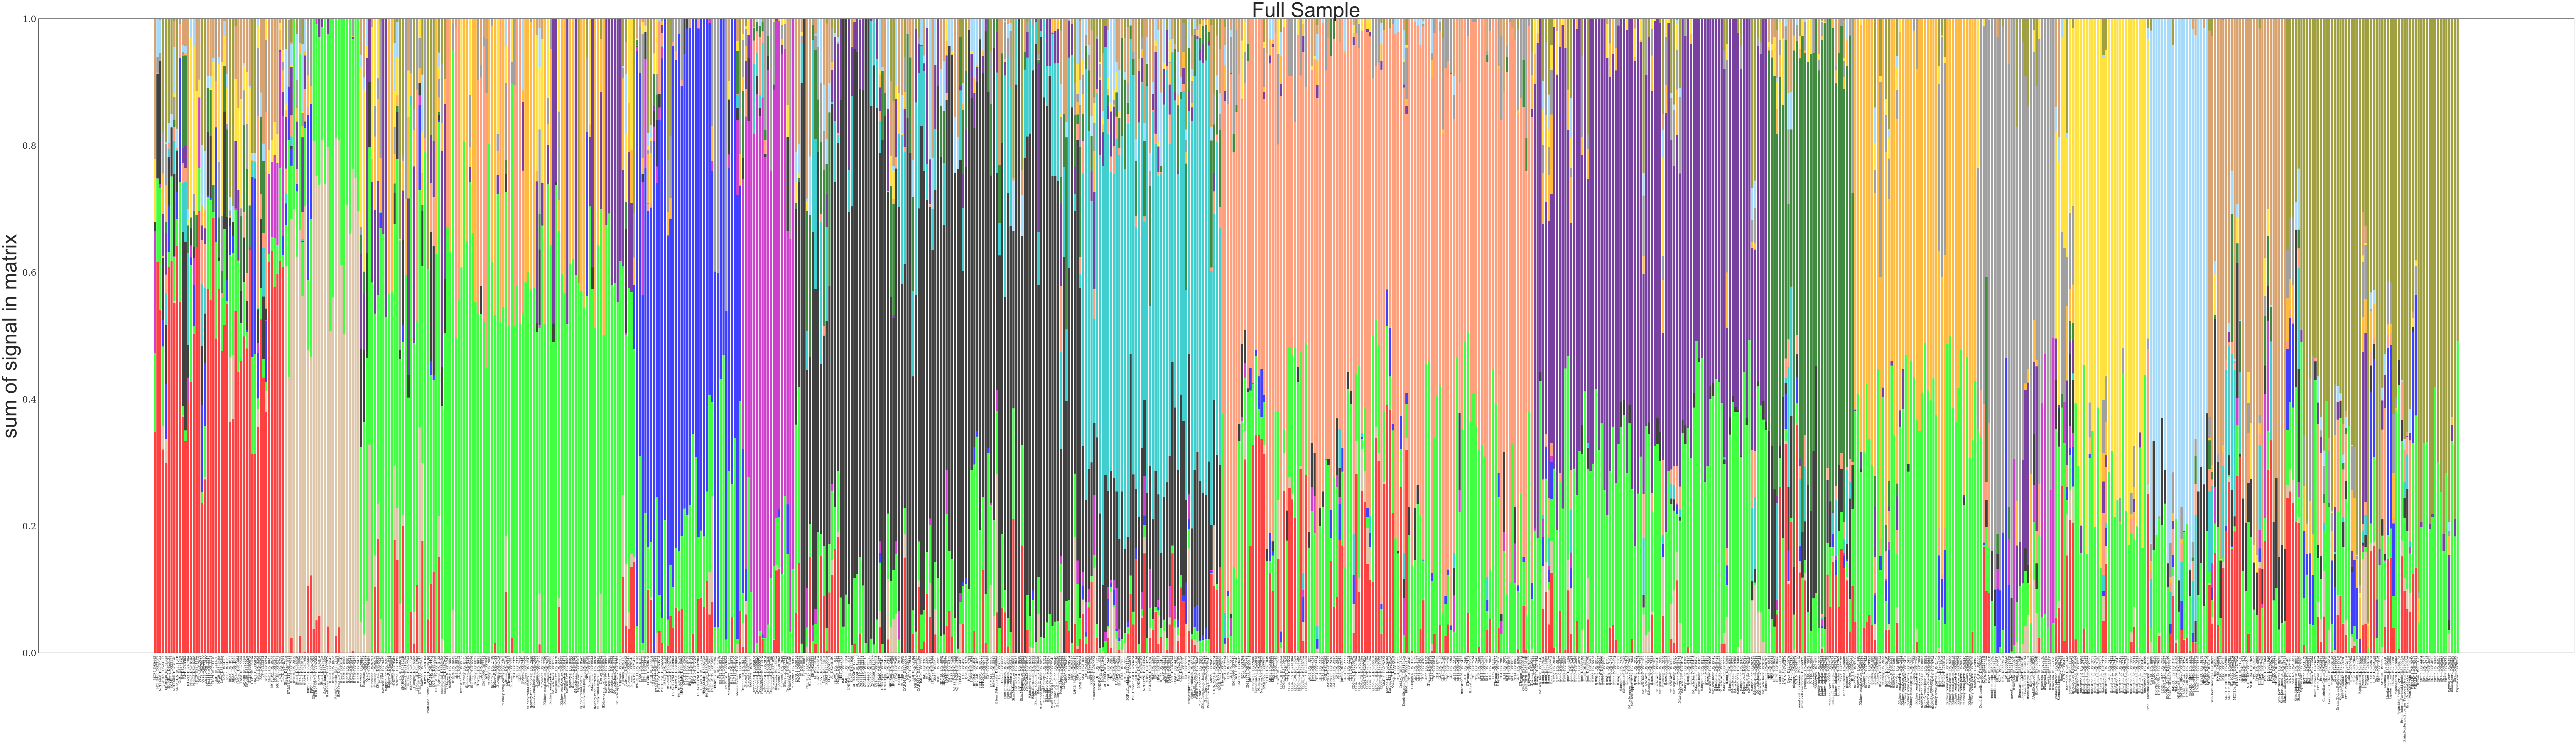

In [65]:
Nsamples = 827
ttt = np.arange(Nsamples)
start = 0
end = Nsamples
ground_pSample = ttt*0
plt.clf()
plt.figure(figsize=(150,40))
BelugaMode = True
answer =16
borfRatsS = borfRats.T

plt.bar(ttt[start:end], borfRatsS[0,start:end][barsortorder], color='r',
             bottom=ground_pSample[start:end], alpha=0.75)
ground_pSample = borfRatsS[0,start:end][barsortorder]

for i in range(1,answer):
    #print(i)
    plt.bar(ttt[start:end],borfRatsS[i,start:end][barsortorder], bottom = ground_pSample, color=first16colors[i], alpha=0.75)
    #plt.fill_between(tt, np.sum(_pSample[0:i+1], axis=0), ground_pSample, facecolor=colors[i],alpha=0.5)
    ground_pSample = np.sum(borfRatsS[0: i+1,start:end], axis=0)[barsortorder]
    #print('ground_pSample ',ground_pSample)

#plt.legend(loc='upper left')

#plt.legend(loc='upper left')
#plt.xlabel('Sample #', fontsize=70)
increase_axis_fontsize()
plt.ylabel('sum of signal in matrix',fontsize=70)
plt.title('Full Sample',fontsize=70)
samplenamesize = 27
thebottom = 0.25
if (BelugaMode):
	samplenamesize = 11
	thebottom = 0.15
plt.xticks(ttt, A['names'][barsortorder], rotation='vertical', fontsize=samplenamesize)
#plt.tight_layout()
plot_margin = 5

'''
x0, x1, y0, y1 = plt.axis()
plt.axis((x0 ,
          x1 ,
          y0 - plot_margin*4,
          y1 + plot_margin))
'''

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=thebottom)
#plt.savefig('bars_for_wouter.pdf')
plt.show()

In [64]:
borfRats.shape

(827, 16)

In [68]:
np.savetxt('ENCODEsample_component_matrix.txt', borfRats)

In [67]:
borfRats

array([[ 0.10660093,  0.00310252,  0.01737827, ...,  0.        ,
         0.60943365,  0.01885668],
       [ 0.00922128,  0.03723553,  0.04750587, ...,  0.        ,
         0.02440974,  0.        ],
       [ 0.2437585 ,  0.02057506,  0.0867798 , ...,  0.        ,
         0.        ,  0.36400372],
       ..., 
       [ 0.        ,  0.        ,  0.42877826, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.49157396, ...,  0.        ,
         0.        ,  0.50842607],
       [ 0.14379053,  0.00793012,  0.32779446, ...,  0.        ,
         0.        ,  0.30718762]], dtype=float32)

In [69]:
import pandas as pd
borfPD = pd.DataFrame(borfRats)

In [71]:
borfPD.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.106601,0.003103,0.017378,0.000000,0.00000,0.000000,0.127208,0.035831,0.0,0.044896,0.004189,0.032504,0.000000,0.0,0.609434,0.018857
1,0.009221,0.037236,0.047506,0.227514,0.42558,0.033327,0.000000,0.000000,0.0,0.104812,0.022732,0.059127,0.008536,0.0,0.024410,0.000000
2,0.243758,0.020575,0.086780,0.127786,0.00000,0.000000,0.000000,0.012573,0.0,0.000000,0.067861,0.076664,0.000000,0.0,0.000000,0.364004
3,0.254470,0.034599,0.106529,0.131940,0.00000,0.000000,0.000000,0.012386,0.0,0.000000,0.050216,0.095701,0.000000,0.0,0.000000,0.314158
4,0.236570,0.035252,0.114964,0.132493,0.00000,0.000000,0.000000,0.009826,0.0,0.000000,0.050689,0.107044,0.000000,0.0,0.000000,0.313161


In [74]:
borfPD['names'] = A['names']

In [79]:
del(borfPD['names'])

In [84]:
borfPD['names'] = A['names'].values

In [85]:
borfPD

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,names
0,0.106601,0.003103,0.017378,0.000000,0.000000,0.000000,0.127208,0.035831,0.000000,0.044896,0.004189,0.032504,0.000000,0.000000,0.609434,0.018857,vHMEC_DS18406
1,0.009221,0.037236,0.047506,0.227514,0.425580,0.033327,0.000000,0.000000,0.000000,0.104812,0.022732,0.059127,0.008536,0.000000,0.024410,0.000000,Trophoblast_DS19317
2,0.243758,0.020575,0.086780,0.127786,0.000000,0.000000,0.000000,0.012573,0.000000,0.000000,0.067861,0.076664,0.000000,0.000000,0.000000,0.364004,SKNDZ_DS21405
3,0.254470,0.034599,0.106529,0.131940,0.000000,0.000000,0.000000,0.012386,0.000000,0.000000,0.050216,0.095701,0.000000,0.000000,0.000000,0.314158,SKNDZ_DS21399
4,0.236570,0.035252,0.114964,0.132493,0.000000,0.000000,0.000000,0.009826,0.000000,0.000000,0.050689,0.107044,0.000000,0.000000,0.000000,0.313161,SKNDZ_DS21387
5,0.205694,0.000000,0.213255,0.000000,0.000000,0.247834,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043743,0.000000,0.289474,Skin.Melanocytes_DS19662
6,0.204812,0.009585,0.031249,0.000000,0.023791,0.178646,0.158393,0.031324,0.000000,0.029463,0.000845,0.000000,0.000000,0.095758,0.000000,0.236135,Skin.Melanocytes_DS18590
7,0.046016,0.010623,0.026834,0.019671,0.037657,0.000000,0.121709,0.010766,0.000000,0.011496,0.011490,0.000402,0.000000,0.000000,0.676296,0.027040,Skin.Keratinocytes_DS18692
8,0.000000,0.049105,0.275870,0.000000,0.000000,0.154613,0.000000,0.000000,0.149259,0.030792,0.000000,0.011823,0.252110,0.019497,0.056930,0.000000,Pancreas_DS20842
9,0.000000,0.028870,0.335360,0.000000,0.000000,0.112663,0.000000,0.000000,0.089668,0.034600,0.000000,0.000000,0.288004,0.017890,0.092944,0.000000,Pancreas_DS20753


In [86]:
borfPD.to_csv('ENCODEsample_component_matrix_withnames.txt', sep='\t')

In [69]:
ground_pSample = borfRats[0,start:end]

In [70]:
ground_pSample

array([ 0.        ,  0.0081321 ,  0.0156572 ,  0.        ,  0.        ,
        0.        ,  0.05125083,  0.        ,  0.05290698,  0.0914584 ,
        0.        ,  0.00935433,  0.        ,  0.12550837,  0.62006152,
        0.02567028], dtype=float32)

In [75]:
borf

array([[0.0, 1767.9301999676197, 3403.898605767021, ...,
        27285.708453876232, 134802.30117189622, 5580.757393175857],
       [0.0, 46161.80770737133, 7006.770874213711, ..., 0.0,
        3025.835620550998, 0.0],
       [0.0, 23944.358497591627, 13849.751678720808, ..., 0.0, 0.0,
        51607.730936782784],
       ..., 
       [0.0, 1943.9419048828854, 28926.60190926181, ...,
        484.08464076730627, 0.0, 1077.6160137591198],
       [0.0, 0.0, 23671.52518993743, ..., 0.0, 0.0, 18823.877678087672],
       [0.0, 8460.74393229505, 21874.315981082043, ..., 0.0, 0.0,
        19850.66591783058]], dtype=object)

In [76]:
borfRats

array([[ 0.        ,  0.0081321 ,  0.0156572 , ...,  0.12550837,
         0.62006152,  0.02567028],
       [ 0.        ,  0.28589508,  0.04339521, ...,  0.        ,
         0.01873998,  0.        ],
       [ 0.        ,  0.19136843,  0.11069018, ...,  0.        ,
         0.        ,  0.41246003],
       ..., 
       [ 0.        ,  0.04776083,  0.71069956, ...,  0.01189351,
         0.        ,  0.02647602],
       [ 0.        ,  0.        ,  0.55703729, ...,  0.        ,
         0.        ,  0.44296268],
       [ 0.        ,  0.14474796,  0.37422982, ...,  0.        ,
         0.        ,  0.33960885]], dtype=float32)

In [78]:
np.sum(borfRats, axis=1)

array([ 1.        ,  1.        ,  1.        ,  0.99999994,  1.        ,
        1.        ,  1.        ,  0.99999994,  0.99999994,  1.        ,
        1.        ,  0.99999994,  1.        ,  1.        ,  1.        ,
        1.00000012,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  0.99999994,  1.        ,  1.        ,
        1.        ,  1.00000012,  1.        ,  1.        ,  0.99999994,
        0.99999994,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  0.99999994,  1.        ,  1.        ,
        1.00000012,  1.        ,  1.        ,  0.99999994,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.  

In [79]:
borfRats.shape

(804, 16)

In [121]:
Nclusters = 0
i = 0
already_clustered = np.zeros(Nsamples)
#clustered_list = n
for i in range(answer):
    current_col = borfRats[:,i]
    current_cut = current_col > 0.8
    print(first16colors[i], len(borfRats[current_cut]))
    already_clustered[current_cut] += 1


red 8
tan 13
lime 31
blue 4
m 0
k 5
c 15
coral 24
indigo 4
darkgreen 0
orange 0
grey 6
gold 10
lightskyblue 0
peru 7
olive 7


In [122]:
len(already_clustered[already_clustered.astype(bool)])

134

In [123]:
already_clustered = already_clustered.astype(bool)

In [124]:
Nclusters = 0
i = 0
#clustered_list = n
for i in range(answer):
    current_col = borfRats[:,i]
    current_cut = (current_col > 0.6) * np.invert(already_clustered) 
    print(first16colors[i], len(borfRats[current_cut]))

red 13
tan 18
lime 36
blue 15
m 34
k 18
c 34
coral 38
indigo 14
darkgreen 14
orange 31
grey 15
gold 5
lightskyblue 19
peru 10
olive 22


In [125]:
Nclusters = 0
i = 0
#clustered_list = n
for i in range(answer):
    current_col = borfRats[:,i]
    current_cut = (current_col > 0.6) * np.invert(already_clustered) 
    if len(borfRats[current_cut])>0:
        for j in range(answer):
            if (i is not j):
                j_col = borfRats[:,j]
                secondary_cut = (j_col > 0.15) * np.invert(already_clustered) 
                if(len(borfRats[current_cut*secondary_cut]) > 0):
                    print(first16colors[i]+'-'+first16colors[j]+' '+str(len(borfRats[current_cut*secondary_cut])))
                if (len(borfRats[current_cut*secondary_cut]) > 4): 
                    already_clustered[current_cut*secondary_cut] = True 

        

red-lime 7
red-coral 3
red-lightskyblue 1
tan-lime 8
tan-gold 1
tan-olive 2
lime-tan 1
lime-blue 6
lime-m 3
lime-darkgreen 1
lime-orange 10
lime-olive 1
blue-lime 14
m-lime 31
k-lime 6
k-c 6
k-darkgreen 3
c-lime 23
c-k 1
c-darkgreen 5
coral-lime 3
coral-indigo 1
coral-lightskyblue 10
coral-peru 3
indigo-coral 5
indigo-darkgreen 1
darkgreen-lime 1
darkgreen-blue 4
darkgreen-gold 2
darkgreen-peru 2
darkgreen-olive 1
orange-lime 31
grey-lime 10
gold-lime 2
lightskyblue-coral 15
peru-lime 1
peru-coral 1
olive-tan 6
olive-lime 12


In [126]:
len(already_clustered[already_clustered])

339

In [127]:
Nclusters = 0
i = 0
#clustered_list = n
for i in range(answer):
    current_col = borfRats[:,i]
    current_cut = (current_col > 0.6) * np.invert(already_clustered) 
    if len(borfRats[current_cut])>0:
        for j in range(answer):
            if (i is not j):
                j_col = borfRats[:,j]
                secondary_cut = (j_col > 0.15) * np.invert(already_clustered) 
                if(len(borfRats[current_cut*secondary_cut]) > 0):
                    print(first16colors[i]+'-'+first16colors[j]+' '+str(len(borfRats[current_cut*secondary_cut])))
                    already_clustered[current_cut*secondary_cut] = True 
                

red-coral 3
red-lightskyblue 1
tan-gold 1
tan-olive 2
lime-tan 1
lime-m 3
lime-darkgreen 1
lime-olive 1
k-darkgreen 3
c-k 1
coral-lime 3
coral-indigo 1
coral-peru 3
indigo-darkgreen 1
darkgreen-lime 1
darkgreen-blue 4
darkgreen-gold 1
darkgreen-peru 2
darkgreen-olive 1
gold-lime 2
peru-lime 1
peru-coral 1


In [128]:
len(already_clustered[already_clustered])

377

In [129]:
Nclusters = 0
i = 0
#clustered_list = n
for i in range(answer):
    current_col = borfRats[:,i]
    current_cut = (current_col > 0.6) * np.invert(already_clustered) 
    print(first16colors[i], len(borfRats[current_cut]))

red 2
tan 7
lime 14
blue 1
m 3
k 3
c 5
coral 21
indigo 8
darkgreen 5
orange 0
grey 5
gold 3
lightskyblue 4
peru 8
olive 4


In [130]:
Nclusters = 0
i = 0
#clustered_list = n
for i in range(answer):
    current_col = borfRats[:,i]
    current_cut = (current_col > 0.6) * np.invert(already_clustered) 
    already_clustered[current_cut] = True

    #print(first16colors[i], len(borfRats[current_cut]))

In [131]:
len(already_clustered[already_clustered])

470

In [132]:
Nclusters = 0
i = 0
#clustered_list = n
for i in range(answer):
    current_col = borfRats[:,i]
    current_cut = (current_col > 0.4) * np.invert(already_clustered) 
    if len(borfRats[current_cut])>0:
        for j in range(answer):
            if (i is not j):
                j_col = borfRats[:,j]
                secondary_cut = (j_col > 0.15) * np.invert(already_clustered) 
                if(len(borfRats[current_cut*secondary_cut]) > 0):
                    print(first16colors[i]+'-'+first16colors[j]+' '+str(len(borfRats[current_cut*secondary_cut])))
                if (len(borfRats[current_cut*secondary_cut]) > 4): 
                    already_clustered[current_cut*secondary_cut] = True 


tan-lime 8
tan-gold 2
tan-olive 2
lime-tan 1
lime-blue 6
lime-m 16
lime-k 1
lime-c 13
lime-darkgreen 1
lime-orange 14
lime-grey 4
lime-olive 10
blue-lime 1
blue-c 1
blue-darkgreen 1
m-lime 3
m-olive 3
k-tan 1
k-lime 16
k-c 4
k-darkgreen 4
c-lime 4
c-darkgreen 6
coral-red 1
coral-lime 4
coral-m 4
coral-indigo 5
coral-darkgreen 1
coral-orange 1
coral-lightskyblue 6
coral-peru 1
indigo-lime 1
indigo-coral 3
indigo-darkgreen 3
darkgreen-tan 1
darkgreen-lime 4
darkgreen-blue 4
darkgreen-coral 3
darkgreen-indigo 1
darkgreen-lightskyblue 1
darkgreen-peru 2
orange-lime 2
orange-m 1
orange-olive 1
grey-tan 1
grey-lime 4
gold-tan 1
gold-lime 2
gold-coral 1
lightskyblue-red 1
lightskyblue-coral 21
lightskyblue-peru 1
peru-lime 1
peru-darkgreen 5
olive-tan 5
olive-lime 7
olive-darkgreen 1


In [133]:
len(already_clustered[already_clustered])

608

In [134]:
Nclusters = 0
i = 0
#clustered_list = n
for i in range(answer):
    current_col = borfRats[:,i]
    current_cut = (current_col > 0.4) * np.invert(already_clustered) 
    if len(borfRats[current_cut])>0:
        for j in range(answer):
            if (i is not j):
                j_col = borfRats[:,j]
                secondary_cut = (j_col > 0.15) * np.invert(already_clustered) 
                if(len(borfRats[current_cut*secondary_cut]) > 0):
                    print(first16colors[i]+'-'+first16colors[j]+' '+str(len(borfRats[current_cut*secondary_cut])))

tan-gold 2
tan-olive 2
lime-tan 1
lime-k 1
lime-darkgreen 1
lime-grey 4
blue-lime 1
blue-c 1
blue-darkgreen 1
m-lime 3
m-olive 3
k-tan 1
k-c 4
k-darkgreen 4
c-lime 4
coral-red 1
coral-lime 4
coral-m 3
coral-darkgreen 1
coral-orange 1
coral-peru 1
indigo-lime 1
indigo-coral 3
indigo-darkgreen 3
darkgreen-tan 1
darkgreen-lime 4
darkgreen-blue 4
darkgreen-coral 3
darkgreen-indigo 1
darkgreen-lightskyblue 1
darkgreen-peru 2
orange-lime 2
orange-m 1
orange-olive 1
grey-tan 1
grey-lime 4
gold-tan 1
gold-lime 2
gold-coral 1
lightskyblue-peru 1
peru-lime 1
olive-darkgreen 1


In [135]:
Nclusters = 0
i = 0
#clustered_list = n
for i in range(answer):
    current_col = borfRats[:,i]
    current_cut = (current_col > 0.4) * np.invert(already_clustered) 
    if len(borfRats[current_cut])>0:
        for j in range(answer):
            if (i is not j):
                j_col = borfRats[:,j]
                secondary_cut = (j_col > 0.15) * np.invert(already_clustered) 
                if(len(borfRats[current_cut*secondary_cut]) > 0):
                    print(first16colors[i]+'-'+first16colors[j]+' '+str(len(borfRats[current_cut*secondary_cut])))
                if (len(borfRats[current_cut*secondary_cut]) > 0): 
                    already_clustered[current_cut*secondary_cut] = True 


tan-gold 2
tan-olive 2
lime-tan 1
lime-k 1
lime-darkgreen 1
lime-grey 4
blue-lime 1
blue-c 1
m-lime 3
m-olive 3
k-tan 1
k-c 4
k-darkgreen 3
c-lime 4
coral-red 1
coral-lime 4
coral-m 3
coral-darkgreen 1
coral-orange 1
coral-peru 1
indigo-lime 1
indigo-coral 2
indigo-darkgreen 3
darkgreen-tan 1
darkgreen-lime 4
darkgreen-blue 3
darkgreen-coral 2
darkgreen-indigo 1
darkgreen-lightskyblue 1
darkgreen-peru 1
orange-lime 2
orange-olive 1
grey-tan 1
grey-lime 1
gold-tan 1
gold-lime 2
lightskyblue-peru 1
peru-lime 1
olive-darkgreen 1


In [136]:
len(already_clustered[already_clustered])

680

In [137]:
Nclusters = 0
i = 0
#clustered_list = n
for i in range(answer):
    current_col = borfRats[:,i]
    current_cut = (current_col > 0.4) * np.invert(already_clustered) 
    print(first16colors[i], len(borfRats[current_cut]))

red 0
tan 0
lime 9
blue 2
m 0
k 0
c 0
coral 7
indigo 0
darkgreen 5
orange 2
grey 0
gold 0
lightskyblue 1
peru 0
olive 7


In [138]:
Nclusters = 0
i = 0
#clustered_list = n
for i in range(answer):
    current_col = borfRats[:,i]
    current_cut = (current_col > 0.4) * np.invert(already_clustered) 
    print(first16colors[i], len(borfRats[current_cut]))
    already_clustered[current_cut] = True 

red 0
tan 0
lime 9
blue 2
m 0
k 0
c 0
coral 7
indigo 0
darkgreen 5
orange 2
grey 0
gold 0
lightskyblue 1
peru 0
olive 7


In [139]:
len(already_clustered[already_clustered])

713

In [140]:
borfRats[np.invert(already_clustered)]

array([[ 0.        ,  0.20291324,  0.12741488, ...,  0.        ,
         0.        ,  0.35939598],
       [ 0.        ,  0.20950381,  0.13817713, ...,  0.        ,
         0.        ,  0.35966131],
       [ 0.03591112,  0.        ,  0.22733857, ...,  0.        ,
         0.        ,  0.2501888 ],
       ..., 
       [ 0.        ,  0.1256533 ,  0.39917991, ...,  0.        ,
         0.        ,  0.12667598],
       [ 0.03246773,  0.        ,  0.        , ...,  0.37649059,
         0.06430455,  0.04728361],
       [ 0.        ,  0.14474796,  0.37422982, ...,  0.        ,
         0.        ,  0.33960885]], dtype=float32)

In [141]:
Nclusters = 0
i = 0
#clustered_list = n
for i in range(answer):
    current_col = borfRats[:,i]
    current_cut = (current_col > 0.3) * np.invert(already_clustered) 
    if len(borfRats[current_cut])>0:
        for j in range(answer):
            if (i is not j):
                j_col = borfRats[:,j]
                secondary_cut = (j_col > 0.15) * np.invert(already_clustered) 
                if(len(borfRats[current_cut*secondary_cut]) > 0):
                    print(first16colors[i]+'-'+first16colors[j]+' '+str(len(borfRats[current_cut*secondary_cut])))
                if (len(borfRats[current_cut*secondary_cut]) > 0): 
                    already_clustered[current_cut*secondary_cut] = True 


tan-lime 2
lime-tan 2
lime-blue 3
lime-m 2
lime-k 2
lime-coral 3
lime-darkgreen 2
lime-orange 4
lime-grey 1
lime-olive 1
blue-lime 2
blue-darkgreen 1
m-olive 2
k-lime 2
k-c 1
c-darkgreen 1
coral-lime 3
coral-indigo 3
coral-darkgreen 1
coral-grey 1
coral-lightskyblue 1
coral-peru 1
darkgreen-tan 2
darkgreen-lime 2
darkgreen-coral 2
darkgreen-gold 2
darkgreen-olive 1
orange-olive 1
grey-tan 1
lightskyblue-coral 2
lightskyblue-indigo 2
peru-coral 2
peru-darkgreen 1
olive-tan 3


In [142]:
len(already_clustered[already_clustered])

775

In [143]:
borfRats[np.invert(already_clustered)]

array([[  3.59111167e-02,   0.00000000e+00,   2.27338567e-01,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.56891817e-01,   0.00000000e+00,
          2.29669690e-01,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.50188798e-01],
       [  9.50148925e-02,   0.00000000e+00,   3.41359153e-02,
          0.00000000e+00,   0.00000000e+00,   1.53889107e-02,
          2.48774141e-02,   1.80335790e-01,   2.20784843e-02,
          2.03823209e-01,   0.00000000e+00,   1.15717482e-02,
          2.04523467e-02,   1.67668954e-01,   0.00000000e+00,
          2.24652335e-01],
       [  2.11392324e-02,   0.00000000e+00,   2.89389908e-01,
          2.48333976e-01,   6.27910718e-02,   0.00000000e+00,
          0.00000000e+00,   1.77365139e-01,   0.00000000e+00,
          5.08912373e-03,   8.87401626e-02,   4.38935794e-02,
          0.00000000e+00,   0.00000000e+00,   6.32578135e-02,
          0.0000

In [148]:
Nclusters = 0
i = 0
#clustered_list = n
for i in range(answer):
    current_col = borfRats[:,i]
    current_cut = (current_col > 0.2) * np.invert(already_clustered) 
    if len(borfRats[current_cut])>0:
        for j in range(answer):
            if (i is not j):
                j_col = borfRats[:,j]
                secondary_cut = (j_col > 0.15) * np.invert(already_clustered) 
                if(len(borfRats[current_cut*secondary_cut]) > 0):
                    print(first16colors[i]+'-'+first16colors[j]+' '+str(len(borfRats[current_cut*secondary_cut])))
                if (len(borfRats[current_cut*secondary_cut]) > 0): 
                    #pass
                    already_clustered[current_cut*secondary_cut] = True 


tan-lime 1
tan-indigo 1
tan-olive 1
lime-blue 1
lime-m 1
lime-k 1
lime-coral 1
blue-darkgreen 1
blue-olive 1
k-lime 1
coral-lime 1
coral-indigo 1
coral-lightskyblue 1
indigo-coral 1
indigo-darkgreen 1
indigo-lightskyblue 1
darkgreen-coral 1
darkgreen-olive 3
lightskyblue-coral 2
lightskyblue-peru 1
olive-tan 2


In [149]:
len(already_clustered[already_clustered])

800

In [150]:
borfRats[np.invert(already_clustered)]

array([[  0.00000000e+00,   8.68233200e-03,   1.50512820e-02,
          4.31425162e-02,   1.04281753e-01,   4.96825613e-02,
          3.16367601e-03,   1.03619136e-01,   0.00000000e+00,
          0.00000000e+00,   9.89628807e-02,   1.45390406e-01,
          1.07943505e-01,   1.70626372e-01,   5.75550552e-03,
          1.43698081e-01],
       [  4.30460684e-02,   5.38773499e-02,   0.00000000e+00,
          1.73409477e-01,   1.28927276e-01,   2.76449248e-02,
          7.48643428e-02,   0.00000000e+00,   1.14188418e-02,
          5.10348603e-02,   1.29675686e-01,   8.84106755e-02,
          0.00000000e+00,   2.50738207e-02,   1.21423183e-02,
          1.80474356e-01],
       [  5.28481230e-02,   0.00000000e+00,   2.60041524e-02,
          1.87247731e-02,   1.86843351e-01,   5.59925996e-02,
          7.48520270e-02,   1.58917382e-01,   4.47073616e-02,
          0.00000000e+00,   2.78423133e-04,   1.06394216e-01,
          3.34261321e-02,   1.50648832e-01,   8.94763693e-02,
          8.8625

In [151]:
A['names'][np.invert(already_clustered)]

150         fUmbilical.cord_DS24722
627                fStomach_DS17878
773            Psoas.Muscle_DS20325
792    fKidney.renal.pelvis_DS20570
Name: names, dtype: object

In [152]:
A['names'][np.invert(already_clustered)]

150         fUmbilical.cord_DS24722
627                fStomach_DS17878
773            Psoas.Muscle_DS20325
792    fKidney.renal.pelvis_DS20570
Name: names, dtype: object